In [ ]:
### Credit Card Transactions Fraud Detection Dataset 
##### https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read_CSV_File
df = pd.read_csv('fraudTrain.csv')
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df.isnull().sum()
# the data set no nulls values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.duplicated().sum()
# the data set no duplicated

0

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract year, month, and day into new columns
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day

# Display the updated DataFrame
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1,1


In [8]:
# Extract the hour, minute, and second into separate columns
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

# Display the updated DataFrame
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6


In [9]:
# Drop the 'trans_date_trans_time' column only if it exists
df = df.drop(columns=['trans_date_trans_time','first','last','Unnamed: 0'], errors='ignore')

# Display the updated DataFrame
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6


In [10]:
df.year.unique()

array([2019, 2020])

#### what is the most gender who use creadit card

gender
F    709863
M    586812
Name: count, dtype: int64


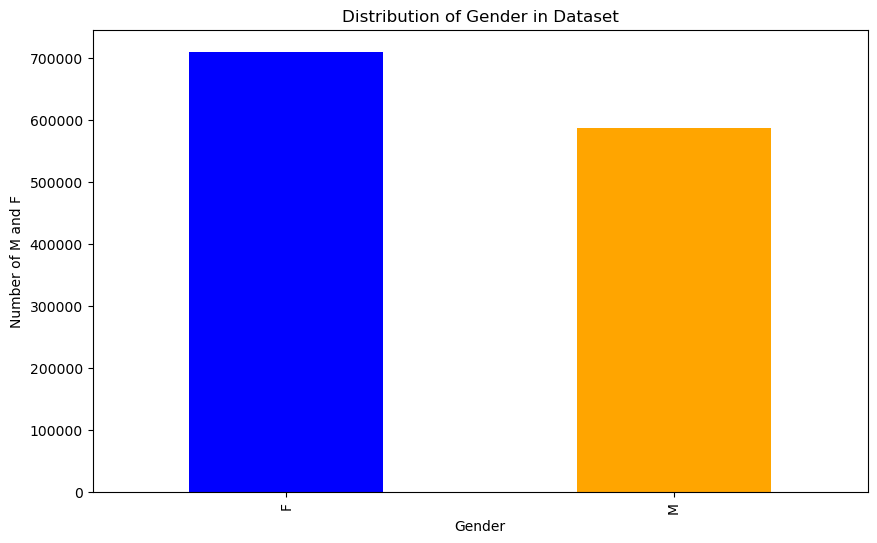

In [11]:
# Get the counts of each gender
gender_counts = df['gender'].value_counts()

# Display total counts of M and F
print(gender_counts)

# Plot the gender counts
gender_counts.plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of M and F')
plt.title('Distribution of Gender in Dataset')

# Show the plot
plt.show()


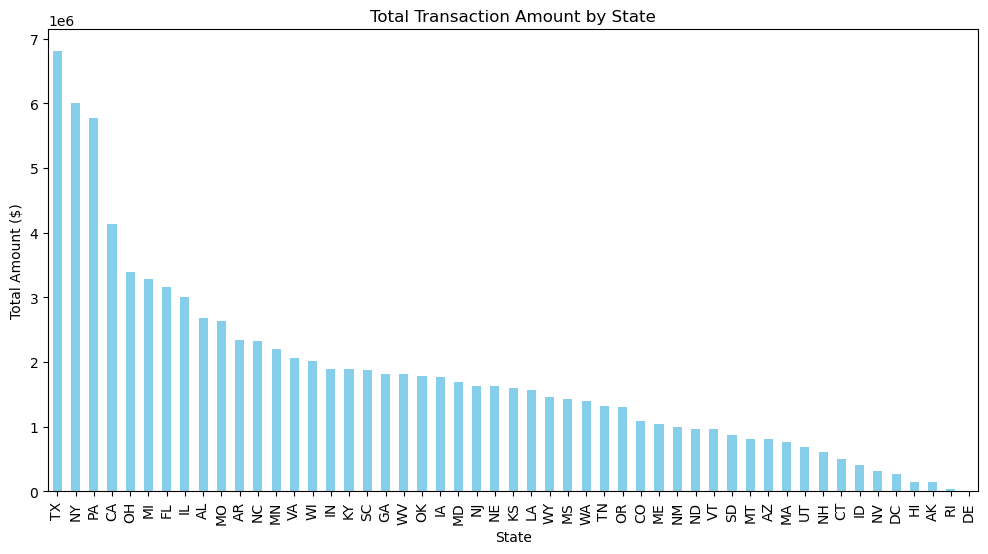

In [12]:
# Group by 'state' and sum the 'amt'
state_amt = df.groupby('state')['amt'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
state_amt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by State')

# Show the plot
plt.show()

In [13]:
# Group by 'state' and sum the 'amt'
state_amt = df.groupby('state')['amt'].sum()

# Find the state with the maximum total amount
max_state = state_amt.idxmax()
max_amt = state_amt.max()

# Find the state with the minimum total amount
min_state = state_amt.idxmin()
min_amt = state_amt.min()

# Print the results
print(f"The state with the maximum total amount is {max_state} with ${max_amt:.2f}")
print(f"The state with the minimum total amount is {min_state} with ${min_amt:.2f}")


The state with the maximum total amount is TX with $6800917.53
The state with the minimum total amount is DE with $4630.44


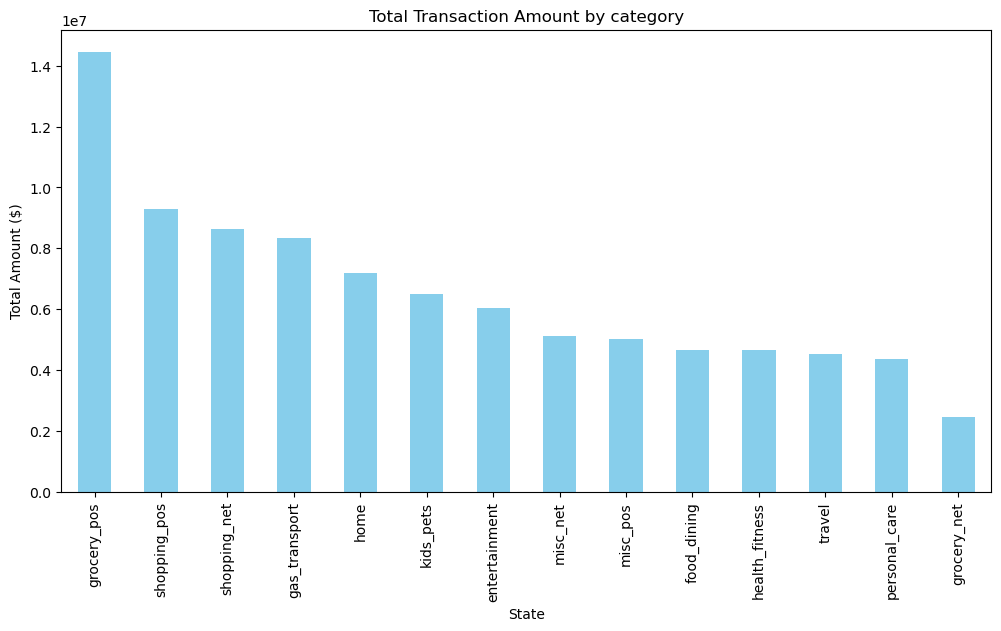

In [14]:
# Group by 'state' and sum the 'amt'
state_amt = df.groupby('category')['amt'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
state_amt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by category')

# Show the plot
plt.show()

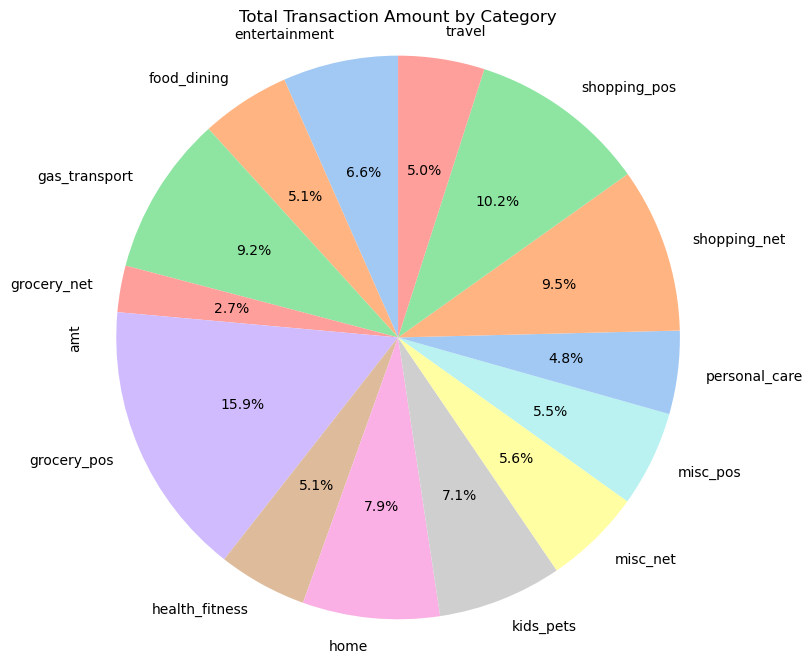

The category with the maximum total amount is grocery_pos with $14460822.38
The category with the minimum total amount is grocery_net with $2439412.68


In [20]:
# Plot the pie chart for transaction amounts by category
category_amt = df.groupby('category')['amt'].sum()
plt.figure(figsize=(8,8))
category_amt.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Add title
plt.title('Total Transaction Amount by Category')

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()

# Get max and min category amounts
max_category = category_amt.idxmax()
max_amt = category_amt.max()
min_category = category_amt.idxmin()
min_amt = category_amt.min()

# Print max and min results for category
print(f"The category with the maximum total amount is {max_category} with ${max_amt:.2f}")
print(f"The category with the minimum total amount is {min_category} with ${min_amt:.2f}")

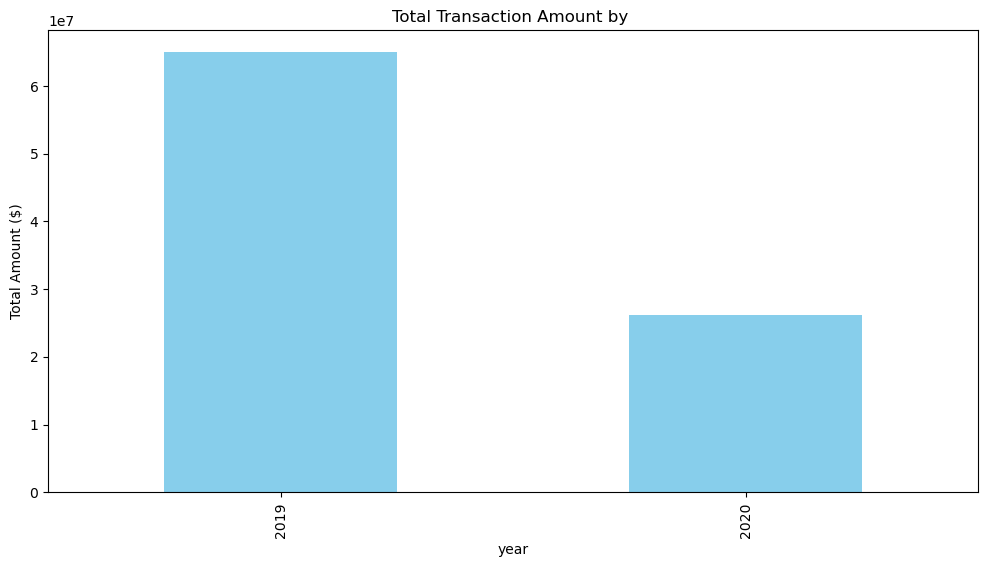

In [16]:
# Group by 'state' and sum the 'amt'
year_amt = df.groupby('year')['amt'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
year_amt.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('year')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by ')

# Show the plot
plt.show()

In [17]:
# Group by 'state' and sum the 'amt'
year_amt = df.groupby('year')['amt'].sum()

# Find the state with the maximum total amount
max_year = year_amt.idxmax()
max_amt = year_amt.max()

# Find the state with the minimum total amount
min_year = year_amt.idxmin()
min_amt = year_amt.min()

# Print the results
print(f"The year with the maximum total amount is {max_year} with ${max_amt:.2f}")
print(f"The  year with the minimum total amount is {min_year} with ${min_amt:.2f}")

The year with the maximum total amount is 2019 with $64984952.93
The  year with the minimum total amount is 2020 with $26237475.97


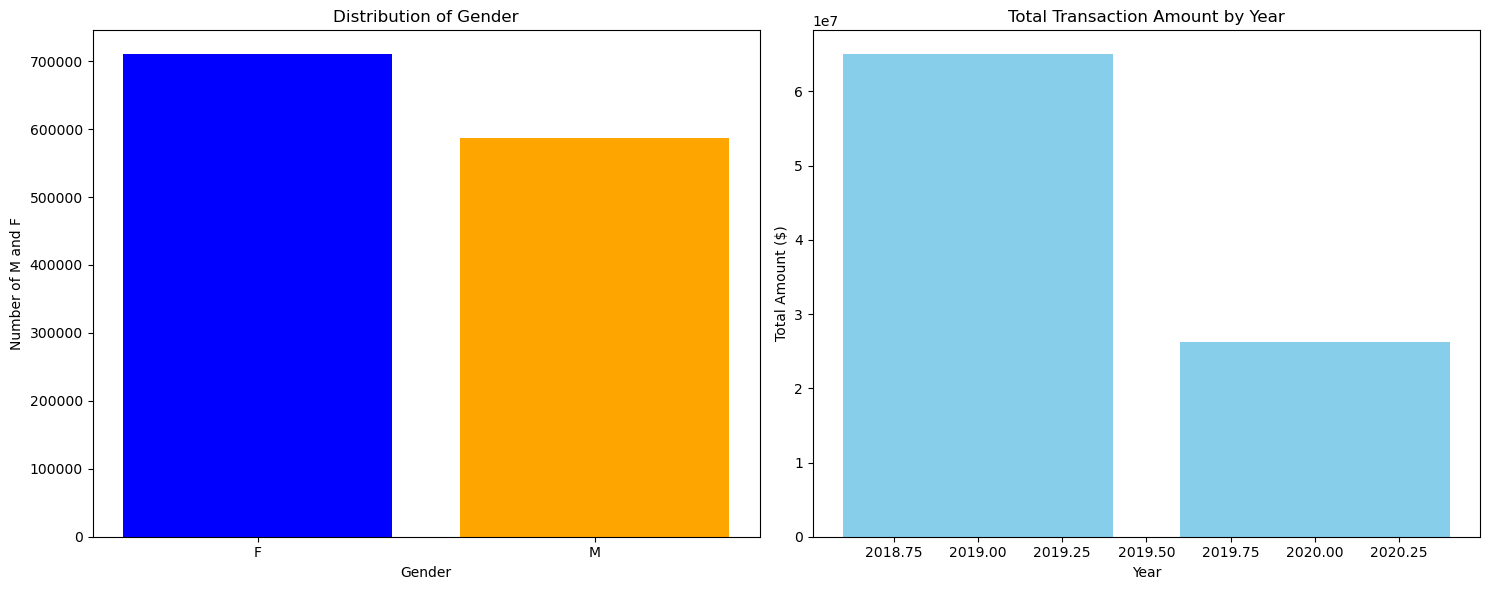

In [18]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15,6))

# Plot the gender counts on the first subplot
gender_counts = df['gender'].value_counts()
ax[0].bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of M and F')
ax[0].set_title('Distribution of Gender')

# Group by 'year' and sum the 'amt', then plot on the second subplot
year_amt = df.groupby('year')['amt'].sum().sort_values(ascending=False)
ax[1].bar(year_amt.index, year_amt.values, color='skyblue')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Amount ($)')
ax[1].set_title('Total Transaction Amount by Year')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



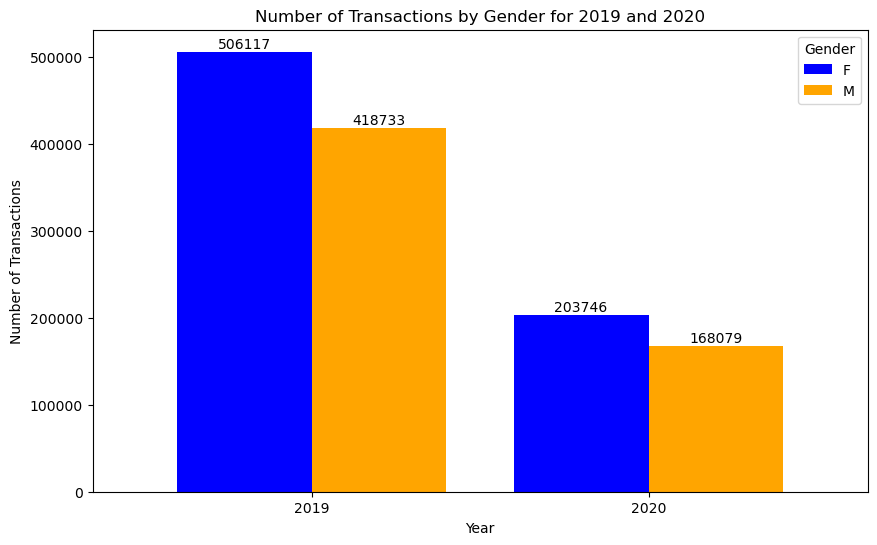

gender            F            M
year                            
2019    35444296.42  29540656.51
2020    14388316.41  11849159.56


In [19]:
import matplotlib.pyplot as plt

# Filter the data for the years 2019 and 2020
df_filtered = df[df['year'].isin([2019, 2020])]

# Group by 'year' and 'gender', then count the number of transactions
gender_year_counts = df_filtered.groupby(['year', 'gender'])['amt'].count().unstack().fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each gender
gender_year_counts.plot(kind='bar', ax=ax, width=0.8, color=['blue', 'orange'])

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Gender for 2019 and 2020')

# Add legend
ax.legend(title='Gender')

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Filter the data for the years 2019 and 2020
df_filtered = df[df['year'].isin([2019, 2020])]

# Group by 'year' and 'gender', then sum the 'amt'
gender_year_amt = df_filtered.groupby(['year', 'gender'])['amt'].sum().unstack().fillna(0)

# Print the results
print(gender_year_amt)